In [1]:
from os import path

DATA_DIRECTORY = path.join('2_series_naturales')
CSV_DIRECTORY  = path.join(DATA_DIRECTORY, 'CSV_results')


# 0. Contar la cantidad de ventanas generadas

In [2]:
from csv_creator import create_csv_with_dataset_length
from charts import Displacements
from experiments_configuration import get_natural_windows

create_csv_with_dataset_length(
    data_length=100000, 
    windows_list=get_natural_windows(), 
    displacements_list=Displacements.values(),
    file=path.join(CSV_DIRECTORY, 'cantidad_de_muestras_segun_ventanas_y_desplazamientos_naturales.csv')
)
    

# 1. Análisis General (sin ventanas ni desplazamientos)

In [4]:
from charts import GeneralPerformanceChart
from charts import get_MLP2_model_data, get_MLP3_model_data, Matrix2x2Configuration


MLP2_config = Matrix2x2Configuration(
    architecture='MLP 2 capas',
    dataframe=get_MLP2_model_data(
        layer1_units=25,
        dropout_rate=0.3,
        file=path.join(CSV_DIRECTORY, 'MLP2_resumen.csv')
    ),
    base_dataframe=get_MLP2_model_data(
        layer1_units=25,
        dropout_rate=0.3,
        file=path.join(CSV_DIRECTORY, 'MLP2_resumen_base.csv')
    )
)


MLP3_config = Matrix2x2Configuration(
    architecture='MLP 3 capas',
    dataframe=get_MLP3_model_data(
        layer1_units=25,
        layer2_units=10,
        dropout_rate=0.2,
        file=path.join(CSV_DIRECTORY, 'MLP3_resumen.csv'),
    ),
    base_dataframe=get_MLP3_model_data(
        layer1_units=25,
        layer2_units=10,
        dropout_rate=0.2,
        file=path.join(CSV_DIRECTORY, 'MLP3_resumen_base.csv'),
    )
)


## 1.1 Graficas Generales

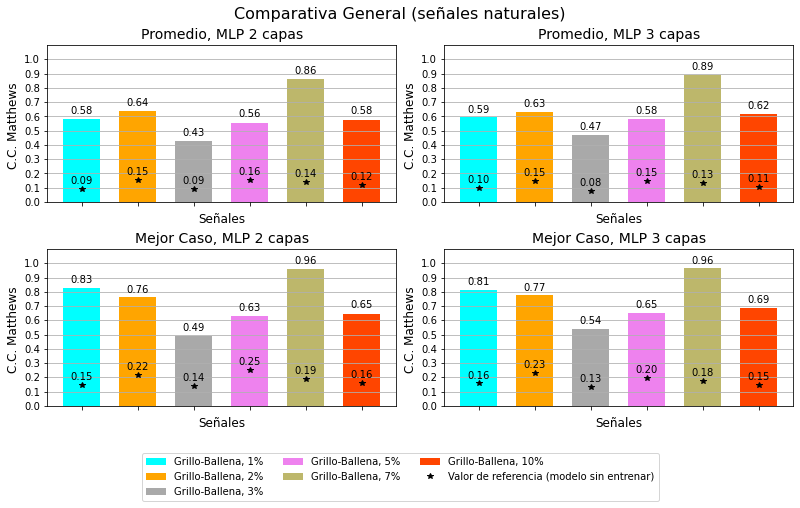

In [5]:
from experiments_configuration import get_natural_prefixes
from charts import build_legend_entry_for_animals

GeneralPerformanceChart().plot_dataframe(
    title='Comparativa General (señales naturales)',
    row_1_title='Promedio',
    row_2_title='Mejor Caso',
    row_1_column='promedio',
    row_2_column='mejor',
    config1=MLP2_config, 
    config2=MLP3_config, 
    series=[(build_legend_entry_for_animals(prefix), prefix) for prefix in get_natural_prefixes()]
)


# 2. Análisis de ventanas y desplazamientos

In [2]:
from os import path
from charts import Matrix2x2Configuration
from csv_creator import read_csv_file


MLP2_config = Matrix2x2Configuration(
    architecture='MLP 2 capas',
    dataframe=read_csv_file(path.join(CSV_DIRECTORY, 'MLP2', 'MLP2_model_25_0.3.csv')),
    base_dataframe=read_csv_file(path.join(CSV_DIRECTORY, 'MLP2', 'MLP2_model_25_0.3_base.csv'))
)


MLP3_config = Matrix2x2Configuration(
    architecture='MLP 3 capas',
    dataframe=read_csv_file(path.join(CSV_DIRECTORY, 'MLP3', 'MLP3_model_25_10_0.2.csv')),
    base_dataframe=read_csv_file(path.join(CSV_DIRECTORY, 'MLP3', 'MLP3_model_25_10_0.2_base.csv'))
)




## 2.1. Análisis de desplazamientos 

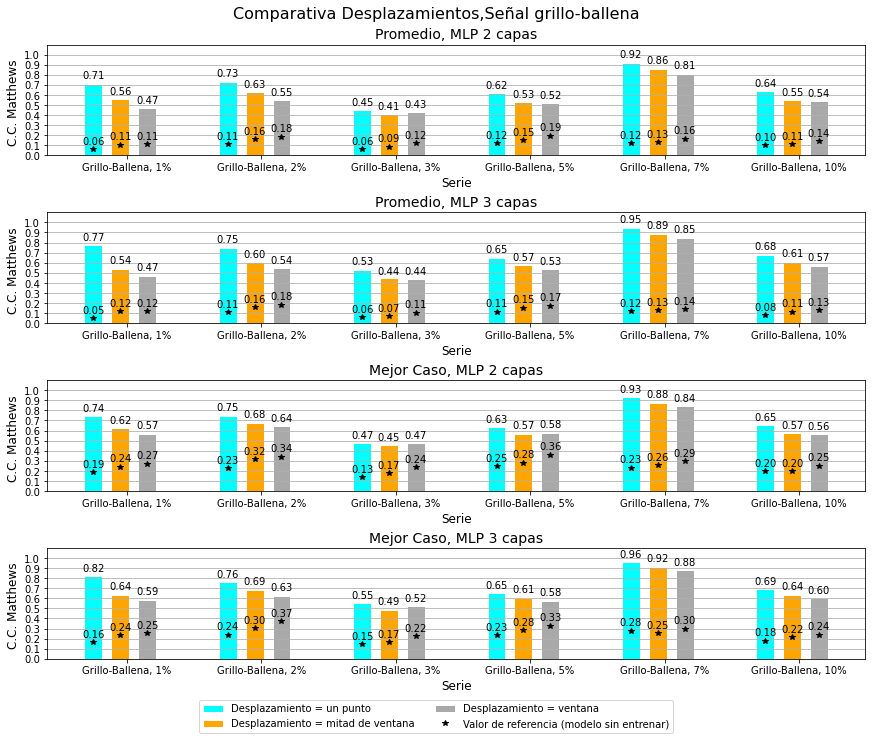

In [7]:
from charts import RowsDisplacementsChart
from experiments_configuration import get_natural_prefixes, get_natural_windows



RowsDisplacementsChart(
    MLP2_config, 
    MLP3_config, 
    windows=get_natural_windows(),
    chart_width=12, 
    chart_height=10
    
).plot_dataframe(
    'Comparativa Desplazamientos,Señal grillo-ballena',
    'Promedio', 
    'Mejor Caso',
    prefixes=get_natural_prefixes()
)



## 2.2. Análisis de ventanas

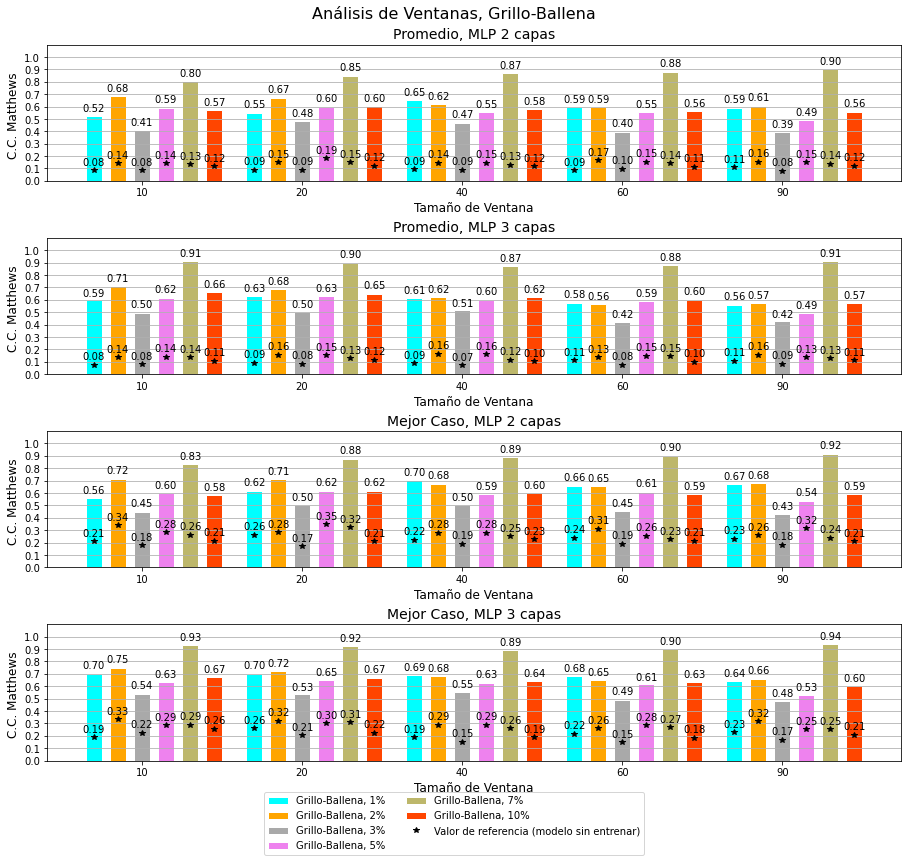

In [13]:
from charts import WindowsPerformanceChart, build_legend_entry_for_animals
from experiments_configuration import get_natural_prefixes, get_natural_windows

WindowsPerformanceChart(
    MLP2_config, 
    MLP3_config, 
    windows=get_natural_windows(),
    bar_width=0.15,
    chart_width=12.5, 
    chart_height=11.5   
).plot_dataframe(
    'Análisis de Ventanas, Grillo-Ballena',
    'Promedio', 
    'Mejor Caso',
    [(build_legend_entry_for_animals(prefix), prefix) for prefix in get_natural_prefixes()]
)